In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# remove pandas column count limit
pd.set_option('display.max_columns', None)

In [2]:
# Select the features for correlation matrix
selected_features = ['id','deviceid','trip_id','speed','acceleration','radial_acceleration','distance_from_start','acceleration_der','bus_stop']
data = pd.read_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance_and_accDiff.csv')
data=data[data['direction']==1]

In [3]:
# drop rows where bus_stop is Nan
data = data.dropna(subset=['bus_stop'])
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,207,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
5,574736663,116,2021-10-16 08:04:34,7.291210,80.637713,8.63931,2021-10-16,08:04:34,POINT (184982.64260533327 232114.61697960715),101,2.0,1,207,-0.035997,0.639311,343.141212,0 days 00:00:15,-0.395969,-0.026398
6,574736664,116,2021-10-16 08:04:49,7.290943,80.638160,0.00000,2021-10-16,08:04:49,POINT (185031.9565310351 232085.11003064158),101,2.0,1,207,-0.575954,0.000000,400.646939,0 days 00:00:15,-0.539957,-0.035997
7,574736665,116,2021-10-16 08:05:04,7.290943,80.638157,0.00000,2021-10-16,08:05:04,POINT (185031.58111776915 232085.11014168937),101,2.0,1,207,0.000000,0.000000,401.021945,0 days 00:00:15,0.575954,0.038397
8,574736666,116,2021-10-16 08:05:19,7.290943,80.638157,0.00000,2021-10-16,08:05:19,POINT (185031.58111776915 232085.11014168937),101,2.0,1,207,0.000000,0.000000,401.021945,0 days 00:00:15,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582733,1310921162,262,2022-08-09 13:43:46,7.284913,80.722248,12.95900,2022-08-09,13:43:46,POINT (194316.53699960574 231416.4178102706),113,5587.0,1,185,0.540000,0.859307,14505.797881,0 days 00:00:01,0.339694,0.339694
582739,1310920934,262,2022-08-09 13:45:12,7.291165,80.721315,1.61987,2022-08-09,13:45:12,POINT (194213.5620501584 232107.7557220928),114,5587.0,1,185,-0.199984,0.022378,15229.842366,0 days 00:00:27,-0.199984,-0.007407
582740,1310920932,262,2022-08-09 13:45:14,7.291213,80.721370,3.23974,2022-08-09,13:45:14,POINT (194219.6354906042 232113.096163928),114,5587.0,1,185,0.809935,1.285777,15237.944476,0 days 00:00:02,1.009919,0.504960
582741,1310920931,262,2022-08-09 13:45:15,7.291273,80.721360,5.39957,2022-08-09,13:45:15,POINT (194218.53207706878 232119.7312179307),114,5587.0,1,185,2.159830,0.224263,15244.706727,0 days 00:00:01,1.349895,1.349895


In [4]:
# Convert time to datetime with just hour , minute and second
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.time


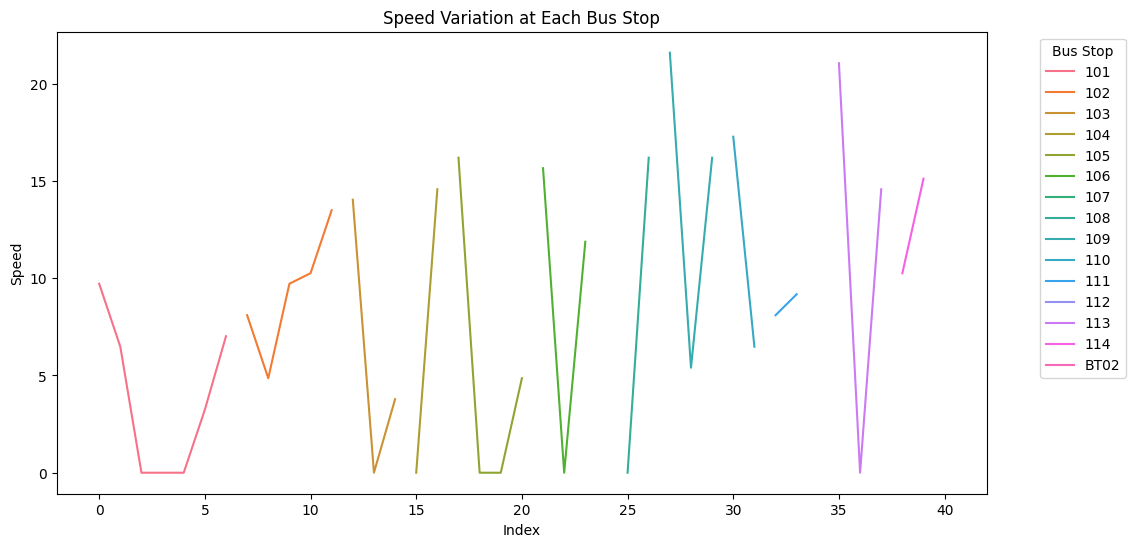

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

data_tid4 = data[data['trip_id'] == 12]
data_tid4.reset_index(drop=True, inplace=True)

# Create a line plot using seaborn with hue based on 'segment'
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_tid4, x=data_tid4.index, y='speed', hue='bus_stop', legend='full')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Speed')
plt.title('Speed Variation at Each Bus Stop')

# Show the legend
plt.legend(title='Bus Stop', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [6]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'bus_data' with columns 'trip_id', 'bus_stop', 'speed', 'acceleration', and 'time'.
# Replace 'bus_data' with your actual DataFrame name.

# Function to convert time strings to datetime objects
def convert_to_datetime(time_str):
    return pd.to_datetime(time_str, format='%H:%M:%S')

# Convert the 'time' column to datetime objects
data['time'] = data['time'].apply(convert_to_datetime)

# Group by 'trip_id' and 'bus_stop'
grouped = data.groupby(['trip_id', 'bus_stop'])

# Initialize empty lists to store results
trip_ids = []
deviceids = []
bus_stops = []
starting_speeds = []
ending_speeds = []
average_speeds = []
starting_accelerations = []
ending_accelerations = []
average_accelerations = []
time_to_slow_down = []
time_to_speed_up = []
time_stay_stop = []

# Loop through each group
for (trip_id, bus_stop), group in grouped:
    
    deviceid = group['deviceid'].iloc[0]
    # Get the starting speed (first speed value)
    start_speed = group['speed'].iloc[0]
    
    # Get the ending speed (last speed value)
    end_speed = group['speed'].iloc[-1]
    
    # Calculate the average speed
    avg_speed = group['speed'].mean()

    # Get the starting acceleration (first acceleration value)
    start_acceleration = group['acceleration'].iloc[0]
    
    # Get the ending acceleration (last acceleration value)
    end_acceleration = group['acceleration'].iloc[-1]
    
    # Calculate the average acceleration
    avg_acceleration = group['acceleration'].mean()

    # Find the minimum speed and corresponding time
    min_speed = group['speed'].min()
    min_time = group[group['speed'] == min_speed]['time'].iloc[0]

    # Find the last time of the minimum speed
    last_time_of_min_speed = group[group['speed'] == min_speed]['time'].iloc[-1]

    # Calculate the time to slow down (from the start to the minimum speed)
    time_to_slow = (pd.to_datetime(min_time) - pd.to_datetime(group['time'].iloc[0])).total_seconds()

    # Calculate the time to speed up (from the minimum speed to the end)
    time_to_speed = (pd.to_datetime(group['time'].iloc[-1]) - pd.to_datetime(last_time_of_min_speed)).total_seconds()

    # Get the total time duration of the bus stop for that trip ID
    total_time_duration = (group['time'].iloc[-1] - group['time'].iloc[0]).total_seconds()
    
    # Check if the slow down time is equal to the total time duration, if so, set it to 0
    if time_to_slow == total_time_duration:
        time_to_slow = 0
        
    # Check if the speed up time is equal to the total time duration, if so, set it to 0
    if time_to_speed == total_time_duration:
        time_to_speed = 0
    
    time_stay_stop.append(total_time_duration-(time_to_slow+time_to_speed))
    
    # Append values to lists
    trip_ids.append(trip_id)
    deviceids.append(deviceid)
    bus_stops.append(bus_stop)
    starting_speeds.append(start_speed)
    ending_speeds.append(end_speed)
    average_speeds.append(avg_speed)
    starting_accelerations.append(start_acceleration)
    ending_accelerations.append(end_acceleration)
    average_accelerations.append(avg_acceleration)
    time_to_slow_down.append(time_to_slow)
    time_to_speed_up.append(time_to_speed)

# Create a new DataFrame to store the results
result_df = pd.DataFrame({
    'trip_id': trip_ids,
    'deviceid': deviceids, 
    'bus_stop': bus_stops,
    'starting_speed': starting_speeds,
    'ending_speed': ending_speeds,
    'average_speed': average_speeds,
    'starting_acceleration': starting_accelerations,
    'ending_acceleration': ending_accelerations,
    'average_acceleration': average_accelerations,
    'time_to_slow_down': time_to_slow_down,
    'time_to_speed_up': time_to_speed_up,
    'time_stay_stop': time_stay_stop
})

# Print the resulting DataFrame
print(result_df)


       trip_id  deviceid bus_stop  starting_speed  ending_speed  \
0          2.0       116      101        9.179270       6.47948   
1          2.0       116      102        5.939530       9.71923   
2          2.0       116      103        7.559400      11.33910   
3          2.0       116      104       16.198700      16.19870   
4          2.0       116      105       19.438500      14.57880   
...        ...       ...      ...             ...           ...   
38006   5587.0       262      110        0.539957       6.47948   
38007   5587.0       262      111       11.339100       8.09935   
38008   5587.0       262      113       12.419000      12.95900   
38009   5587.0       262      114        1.619870       5.39957   
38010   5587.0       262     BT02        2.159830       2.15983   

       average_speed  starting_acceleration  ending_acceleration  \
0           4.049677               0.359971             0.431965   
1           9.179272              -0.179985            -0.1

In [7]:
result_df[result_df['trip_id'] == 4]

,trip_id,deviceid,bus_stop,starting_speed,ending_speed,average_speed,starting_acceleration,ending_acceleration,average_acceleration,time_to_slow_down,time_to_speed_up,time_stay_stop
15,4.0,116,101,7.01944,0.00000,1.889849,0.467963,0.000000,0.000000,30.0,0.0,75.0
16,4.0,116,102,11.87910,12.95900,10.664170,0.072000,0.251982,0.038248,15.0,27.0,0.0
17,4.0,116,103,15.65880,0.00000,7.829400,0.072000,-1.043920,-0.485960,0.0,0.0,15.0
18,4.0,116,104,6.47948,10.25920,5.183590,0.251980,0.431967,0.100792,30.0,30.0,0.0
19,4.0,116,105,17.81860,16.19870,4.252162,0.107993,1.246054,-0.109160,8.0,13.0,75.0
20,4.0,116,106,6.47948,0.00000,2.362311,-0.071995,-0.179985,-0.062995,30.0,0.0,75.0
21,4.0,116,107,15.65880,14.03890,9.044295,0.395971,0.503961,0.071994,15.0,30.0,0.0
22,4.0,116,108,13.49890,15.65880,8.234350,0.071993,0.791940,0.053997,15.0,30.0,0.0
23,4.0,116,109,16.73870,9.17927,2.915771,0.071993,0.395969,-0.055796,10.0,20.0,90.0
24,4.0,116,110,10.79910,13.49890,6.155496,0.071991,0.467961,0.050396,15.0,30.0,15.0


In [8]:
# get the last devicetime for each trip id from data datafraem
devicetime_for_each_trip_id = data.groupby(['trip_id'])['devicetime'].max().reset_index()

# Convert 'devicetime' to a datetime data type
devicetime_for_each_trip_id['devicetime'] = pd.to_datetime(devicetime_for_each_trip_id['devicetime'])

# Create a new 'time_of_day' column based on the time component
devicetime_for_each_trip_id['time_of_day'] = pd.cut(
    devicetime_for_each_trip_id['devicetime'].dt.hour,
    bins=[0, 6, 19, 24],
    labels=['morning', 'day', 'night'],
    include_lowest=True
)

# Now, 'time_of_day' will be 'morning' for times before 6:00 AM,
# 'day' for times between 6:00 AM and 7:00 PM, and 'night' for times after 7:00 PM


In [9]:
# create a dataframe with only trip ids with devicetime before '2022-11-01'
devicetime_for_each_trip_id = devicetime_for_each_trip_id[devicetime_for_each_trip_id['devicetime'] < '2022-11-01']
devicetime_for_each_trip_id

,trip_id,devicetime,time_of_day
0,2.0,2021-10-16 08:53:48,day
1,4.0,2021-10-16 13:18:33,day
2,6.0,2021-10-16 17:28:51,day
3,8.0,2021-10-17 09:21:48,day
4,10.0,2021-10-17 15:44:00,day
...,...,...,...
2547,5577.0,2022-08-03 08:10:15,day
2548,5579.0,2022-08-04 07:39:41,day
2549,5581.0,2022-08-06 07:38:46,day
2550,5585.0,2022-08-09 07:55:47,day


In [10]:
result_df = pd.merge(result_df, devicetime_for_each_trip_id, on=['trip_id'], how='left')
result_df

,trip_id,deviceid,bus_stop,starting_speed,ending_speed,average_speed,starting_acceleration,ending_acceleration,average_acceleration,time_to_slow_down,time_to_speed_up,time_stay_stop,devicetime,time_of_day
0,2.0,116,101,9.179270,6.47948,4.049677,0.359971,0.431965,0.029998,30.0,15.0,30.0,2021-10-16 08:53:48,day
1,2.0,116,102,5.939530,9.71923,9.179272,-0.179985,-0.107991,0.024748,0.0,0.0,42.0,2021-10-16 08:53:48,day
2,2.0,116,103,7.559400,11.33910,7.964370,0.035997,0.575955,0.071994,30.0,15.0,0.0,2021-10-16 08:53:48,day
3,2.0,116,104,16.198700,16.19870,16.198700,0.179987,0.179987,0.179987,0.0,0.0,0.0,2021-10-16 08:53:48,day
4,2.0,116,105,19.438500,14.57880,9.584238,0.251980,0.863929,-0.262106,23.0,15.0,0.0,2021-10-16 08:53:48,day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38006,5587.0,262,110,0.539957,6.47948,3.239739,-0.234322,1.259900,0.431852,0.0,0.0,11.0,2022-08-09 13:56:46,day
38007,5587.0,262,111,11.339100,8.09935,9.719225,-0.149988,-3.239750,-1.694869,0.0,0.0,1.0,2022-08-09 13:56:46,day
38008,5587.0,262,113,12.419000,12.95900,12.689000,0.200306,0.540000,0.370153,0.0,0.0,1.0,2022-08-09 13:56:46,day
38009,5587.0,262,114,1.619870,5.39957,3.419727,-0.199984,2.159830,0.923260,0.0,0.0,3.0,2022-08-09 13:56:46,day


In [11]:
# print the elist of column names
result_df.columns

Index(['trip_id', 'deviceid', 'bus_stop', 'starting_speed', 'ending_speed',
       'average_speed', 'starting_acceleration', 'ending_acceleration',
       'average_acceleration', 'time_to_slow_down', 'time_to_speed_up',
       'time_stay_stop', 'devicetime', 'time_of_day'],
      dtype='object')

In [12]:
features_to_mean = ['starting_speed', 'ending_speed',
       'average_speed', 'starting_acceleration', 'ending_acceleration',
       'average_acceleration', 'time_to_slow_down', 'time_to_speed_up',
       'time_stay_stop']  # Replace with your actual feature names
avg_for_devID_time_of_day_and_bus_stop = result_df.groupby(['deviceid', 'time_of_day', 'bus_stop'])[features_to_mean].mean().reset_index()

In [13]:
avg_for_devID_time_of_day_and_bus_stop

,deviceid,time_of_day,bus_stop,starting_speed,ending_speed,average_speed,starting_acceleration,ending_acceleration,average_acceleration,time_to_slow_down,time_to_speed_up,time_stay_stop
0,116,morning,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,116,morning,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,116,morning,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,116,morning,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,116,morning,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
355,262,night,111,8.63931,5.93953,4.859613,-1.619869,0.848504,-1.697007,2.0,7.0,0.0
356,262,night,112,28.07780,3.23974,10.259192,0.683947,0.539957,-1.564591,9.0,6.0,0.0
357,262,night,113,25.37800,4.31966,9.314265,0.071993,1.439887,-2.148259,8.0,3.0,0.0
358,262,night,114,0.00000,22.13820,9.179257,-0.872238,1.115909,0.261209,0.0,0.0,25.0


In [14]:
# List of features (columns) to consider for filling NaN values
features_to_fill = avg_for_devID_time_of_day_and_bus_stop.columns.difference(['deviceid', 'time_of_day', 'bus_stop'])

# Calculate the mean without considering 'time_of_day' for the selected features
for feature in features_to_fill:
    avg_for_devID_time_of_day_and_bus_stop[feature] = avg_for_devID_time_of_day_and_bus_stop.groupby(['deviceid', 'bus_stop'])[feature].transform(lambda x: x.fillna(x.mean()))


In [15]:
avg_for_devID_time_of_day_and_bus_stop

,deviceid,time_of_day,bus_stop,starting_speed,ending_speed,average_speed,starting_acceleration,ending_acceleration,average_acceleration,time_to_slow_down,time_to_speed_up,time_stay_stop
0,116,morning,101,8.764193,6.749433,4.247826,0.022741,0.354303,-0.020680,28.595486,19.762534,25.424173
1,116,morning,102,8.834115,10.828457,8.987811,-0.019426,0.248152,0.024699,17.452569,12.766642,22.270907
2,116,morning,103,12.602200,11.189246,9.322183,-0.017614,0.443678,-0.055749,12.441579,10.706755,9.857009
3,116,morning,104,14.378760,10.930829,12.066010,0.060585,-0.085317,-0.082650,2.558581,2.229202,10.910587
4,116,morning,105,13.574932,10.906074,7.320186,-0.360223,0.496780,-0.253712,11.125765,15.699803,43.460413
...,...,...,...,...,...,...,...,...,...,...,...,...
355,262,night,111,8.639310,5.939530,4.859613,-1.619869,0.848504,-1.697007,2.000000,7.000000,0.000000
356,262,night,112,28.077800,3.239740,10.259192,0.683947,0.539957,-1.564591,9.000000,6.000000,0.000000
357,262,night,113,25.378000,4.319660,9.314265,0.071993,1.439887,-2.148259,8.000000,3.000000,0.000000
358,262,night,114,0.000000,22.138200,9.179257,-0.872238,1.115909,0.261209,0.000000,0.000000,25.000000


In [ ]:
# save csv file
avg_for_devID_time_of_day_and_bus_stop.to_csv('../DataOut/avg_for_devID_time_of_day_and_bus_stop.csv',index=False)
